<a href="https://colab.research.google.com/github/karthikvijayakumar/EVA/blob/vijkar_development/Project%203/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Installing Keras and importing into current runtime environment

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Importing libraries and functions required for the program

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Loading the MNIST dataset. Note that this dataset comes with a ready made train and test set.

(60000, 28, 28)


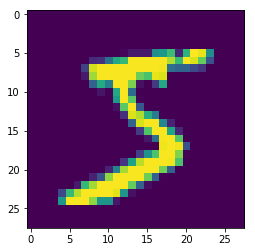

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Visualizing the first training image

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Reshaping images from 28x28 to 28x28x1. This change needs to be done since convolution expects a 3 dimensional matrix.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Bringing the values of pixels to 0-255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Checking out the first ten labels on the training set. Note that these are numbers at this point. More importantly these numbers have an ordinality amongst them

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Converting the numerical labels to categorical values. This is important since the classes 0-9 are just different classes and have no inherent order amongst them ( i.e 7 is not a lesser class than 8 in any way with respect to digit classification )

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Seeing the categorical representation of the labels for the first ten training images

Original model from the excercise

model = Sequential()

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 3x3x1x32 kernel - 26x26x32 image
<br>model.add(Convolution2D(10, 1, activation='relu')) # 1x1x32x10 kernel - 26x26x10 image
<br>model.add(Convolution2D(10, 26)) # 26x26x10x1 kernel - 1x1x10 image
<br>model.add(Flatten())
<br>model.add(Activation('softmax'))

In [10]:
from keras.layers import Activation, BatchNormalization, Dropout
dropout_rate = 0.5


model = Sequential()

# Convolution block 
model.add(Convolution2D(16, (3, 3), activation='relu', input_shape=(28,28,1))) #3x3x1x16 kernel - 26x26x8 image - Receptive Field 3x3
model.add(BatchNormalization())
model.add(Convolution2D(32, (3, 3), activation='relu')) # 3x3x16x32 kernel - 24x24x32 image - Receptive Field 5x5
model.add(BatchNormalization())

# Transition block
model.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling layer - 12x12x32 image - Receptive Field 10x10
model.add(Dropout(dropout_rate))
model.add(Convolution2D(8, (1,1), activation='relu')) # 1x1x32x8 kernel - 12x12x8 image - Receptive Field 10x10
model.add(BatchNormalization())

#Convolution block
model.add(Convolution2D(16, (3, 3), activation='relu')) # 3x3x8x16 kernel - 10x10x16 image - Receptive Field 12x12
model.add(BatchNormalization())
model.add(Convolution2D(32, (3, 3), activation='relu')) # 3x3x16x32 kernel - 8x8x32 image - Receptive Field 14x14
model.add(BatchNormalization())

#Transition block
model.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling layer - 4x4x32 image - Receptive Field 28x28
model.add(Dropout(dropout_rate))
model.add(Convolution2D(10, (1,1), activation='relu')) # 1x1x32x10 kernel - 4x4x10 image
model.add(BatchNormalization())

# Convolution block
model.add(Convolution2D(64, (3, 3), activation='relu')) # 3x3x10x32 kernel - 2x2x10 image - Receptive Field 28x28
model.add(BatchNormalization())
model.add(Convolution2D(10, (2, 2))) # 3x3x64x10 kernel - 1x1x10 image - Receptive Field 28x28

model.add(Flatten())
model.add(Activation('softmax')) 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Defining the model.

The thought process behind the model architecture was to have a series of convolution and transition ( max pooling and 1x1 convolutions ) layers. The last convolution ( layer convd2d_8 ) doesnt have activation or batch normalization on/after it since the convolution is followed by a softmax function which performs the same function as activation.

Batch normaliztion typically follows any layer with an activation. Hence after every convolution operation except the last one there is a batch normaliztion layer immediately following it. The objective of batch normalization is to ensure that the 


I stuck with 16 and 32 kernels in the convolution layers since using 64 kernels overshot the given 20k parameter limit ( 3x3x32x64 = 18432 ). I tried a variety of different architectures ( starting with 4 or 8 kernels without max pooling, 1x1 convolution etc. ). Either they had much poorer accuracy or didnt fit into the 20k parameter limit.

Adding batch normalization and dropout significantly helped improve the training and validation accuracy. That seems understandable, since dropout is deisgned to reduce overfitting and batch normalization removes 



In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 8)         264       
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Compiling the model for training

In [13]:
from keras.callbacks import ModelCheckpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model.fit(X_train, Y_train, batch_size=32, epochs=30, verbose=1, validation_data=(X_test, Y_test), callbacks = callbacks_list)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 39s 648us/step - loss: 0.3140 - acc: 0.9006 - val_loss: 0.0616 - val_acc: 0.9806

Epoch 00001: val_acc improved from -inf to 0.98060, saving model to weights.best.hdf5
Epoch 2/30
60000/60000 [==============================] - 37s 616us/step - loss: 0.0938 - acc: 0.9699 - val_loss: 0.0413 - val_acc: 0.9869

Epoch 00002: val_acc improved from 0.98060 to 0.98690, saving model to weights.best.hdf5
Epoch 3/30
60000/60000 [==============================] - 37s 615us/step - loss: 0.0746 - acc: 0.9768 - val_loss: 0.0375 - val_acc: 0.9884

Epoch 00003: val_acc improved from 0.98690 to 0.98840, saving model to weights.best.hdf5
Epoch 4/30
60000/60000 [==============================] - 36s 608us/step - loss: 0.0629 - acc: 0.9805 - val_loss: 0.0367 - val_acc: 0.9878

Epoch 00004: val_acc did not improve from 0.98840
Epoch 5/30
60000/60000 [====

Fitting the model through gradient descent and tracking the validation accuracy through the training process. The training process itself only focusses on minimizing the loss function. We keep track of the training and validation loss and store the model with the highest validation accuracy after each epoch.

After 30 epochs, the max validation accuracy reached was 99.4%.

In [0]:
model.load_weights("weights.best.hdf5")
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Loading the best model weights ( according to validation accuracty ) stored during the training phase

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

Evaluate the model on the testing dataset

In [16]:
print(score)

[0.019281361722408838, 0.994]


Printing the score of the model on the testing dataset. The first number is the value of the loss function. The latter is the test accuracy.

In [17]:
model.evaluate(X_train, Y_train, verbose=0)

[0.007934711249030564, 0.99755]

Evaluating the model on the training dataset to see what the achieved training accuracy is.

In [0]:
y_pred = model.predict(X_test)

Computing the predicted classifications for the testing dataset

In [19]:
print(y_pred[:9])
print(y_test[:9])

[[4.7855537e-09 3.9689020e-08 2.8905976e-08 9.8552873e-09 1.0986057e-06
  3.3330900e-09 1.8957634e-10 9.9999738e-01 4.0432168e-11 1.4742640e-06]
 [4.2902593e-10 4.3635062e-08 1.0000000e+00 8.8181812e-10 9.8478578e-12
  7.6016884e-14 1.0354593e-08 7.2602639e-11 5.6380060e-11 4.9962326e-12]
 [5.7713370e-12 9.9999928e-01 8.6648901e-09 8.1657670e-10 1.6370807e-09
  2.8449096e-08 7.8598239e-09 7.0718960e-07 2.2707729e-09 5.1805698e-09]
 [9.9991798e-01 2.7395917e-11 8.2094365e-10 7.8188485e-08 3.0713588e-11
  2.0272178e-07 8.1636688e-05 2.7902143e-09 5.4793272e-09 5.3544230e-08]
 [1.8903934e-11 7.2898054e-10 1.5144568e-09 8.2642149e-10 9.9999177e-01
  3.0949472e-09 1.6463402e-09 1.0251080e-09 7.0949149e-08 8.1614862e-06]
 [3.5077744e-12 9.9999821e-01 1.8687081e-07 1.9395848e-11 1.1020138e-08
  3.3700528e-10 7.6442042e-10 1.5950523e-06 2.0188642e-09 9.0239300e-09]
 [1.0402926e-10 1.3181501e-07 6.4809637e-07 7.7076017e-09 9.9874783e-01
  2.5517841e-07 5.4967431e-10 2.4028525e-06 6.9410358e-05 

Comparing the labels computed by our model and that given in the dataset.

Note that for the first element, the target label in the dataset is 11. The output by the model, is in the categorical form described earlier. One can see that first output peaks at index 8 which corresponds to the digit 7.

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

Copying the layers in a dict for visualization in the next step

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

Predefined function for visualizing how an image is processed by a particular layer in the network.

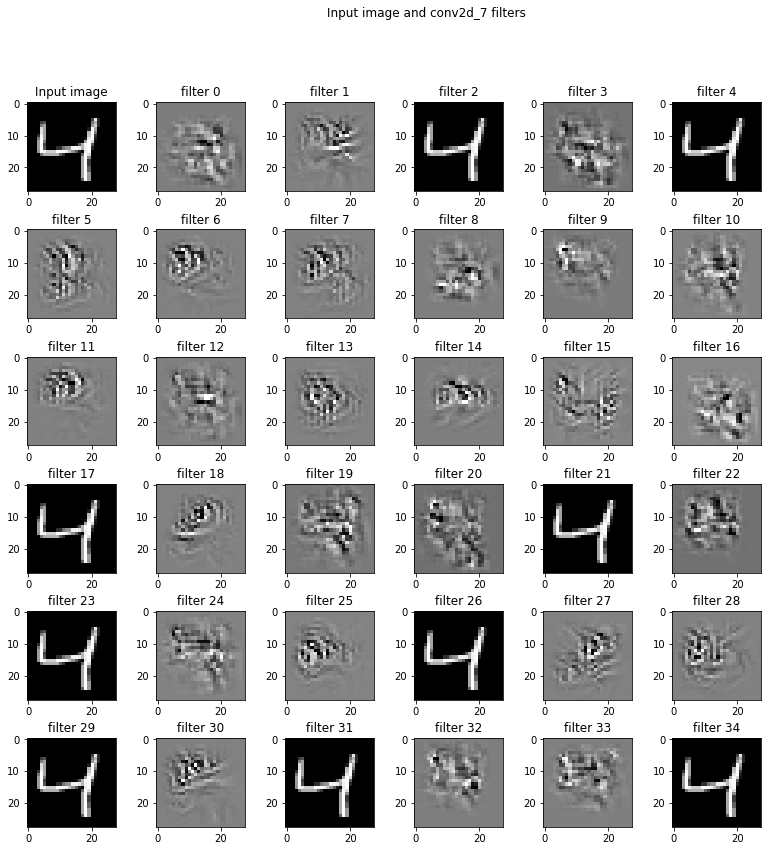

In [23]:
vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), layer_name = 'conv2d_7')

Visualization of the 7th convolution layer ( 3x3x10x32 kernel ). One can see that the exact input image itself shows up in many kernels. This is surprising. I currently dont understand the significance of it